# Classification RCD Experiments

This notebook runs relative class distance (RCD) experiments for 2D classification with IT and GL uncertainty decompositions.

The experiment evaluates how uncertainty estimates behave as the relative class distance (separation between class centers) varies.

**RCD = d_between / sigma_within**

- Lower RCD = more class overlap = higher aleatoric uncertainty at boundaries
- Higher RCD = better separated classes = lower aleatoric uncertainty

Models tested:
- MC Dropout (IT and GL)
- Deep Ensemble (IT and GL)
- BNN (IT and GL)

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
from pathlib import Path

# Add parent directory to path to import utils
project_root = Path.cwd().parent if Path.cwd().name == 'Experiments' else Path.cwd()
sys.path.insert(0, str(project_root))

# Setup results directory
results_dir = project_root / "results" / "classification" / "rcd"
results_dir.mkdir(parents=True, exist_ok=True)
plots_dir = results_dir / "plots"
plots_dir.mkdir(exist_ok=True)
stats_dir = results_dir / "statistics"
stats_dir.mkdir(exist_ok=True)
outputs_dir = results_dir / "outputs"
outputs_dir.mkdir(exist_ok=True)

print(f"Results will be saved to: {results_dir}")

# Import classification experiment utilities
from utils.classification_data import simulate_dataset
from utils.classification_experiments import (
    run_mc_dropout_it_rcd_experiment,
    run_mc_dropout_gl_rcd_experiment,
    run_deep_ensemble_it_rcd_experiment,
    run_deep_ensemble_gl_rcd_experiment,
    run_bnn_it_rcd_experiment,
    run_bnn_gl_rcd_experiment,
)
from utils.device import get_device
import utils.results_save as results_save_module

# Set module-level directories
results_save_module.plots_dir = plots_dir
results_save_module.stats_dir = stats_dir
results_save_module.outputs_dir = outputs_dir

Results will be saved to: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\rcd


## Device Setup

In [2]:
device = get_device()
print(f"Using device: {device}")

CUDA not available. Using CPU.
Using device: cpu


## Data Generation Setup

Configure the base dataset for RCD experiments.

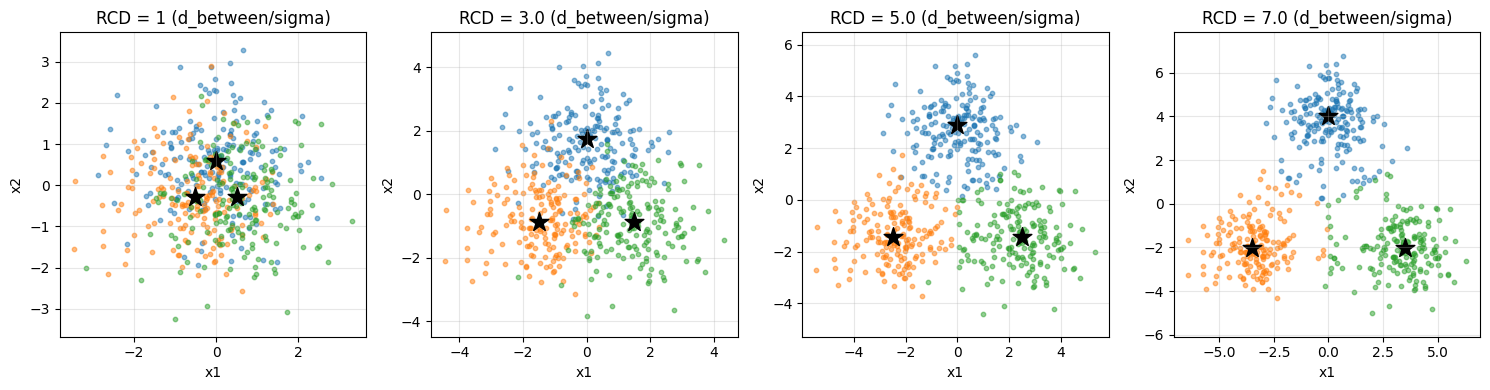

Note: Lower RCD values result in more class overlap and higher aleatoric uncertainty at boundaries.


In [3]:
# Reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# Base configuration (rcd will be varied)
base_cfg = {
    "N_train": 500,
    "N_test": 500,
    "num_classes": 3,
    "blob_sigma": 1,
    "tau": 0.2,
    "rcd": 3.0,  # Will be varied (relative class distance)
    "sigma_in": 0.0,
    "seed": seed,
    "boundary_enrichment": {
        "enabled": True,
        "n": 50,        # Number of extra boundary points
        "spread": 1.0,   # How far along boundary (multiplier of blob_sigma)
        "width": 0.3,    # Perpendicular noise (lower = tighter on boundary)
    },
    # Model hyperparameters
    "input_dim": 2,
    "epochs": 300,
    "batch_size": 32,
    "lr": 1e-3,
    "dropout_p": 0.25,
    "mc_samples": 100,
    "gl_samples": 100,
    "K": 20,
    "hidden_width": 32,
    "weight_scale": 1.0,
    "warmup": 200,
    "samples": 200,
    "chains": 1,
}

# Visualize effect of relative class distance
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
rcd_examples = [1, 3.0, 5.0, 7.0]

for ax, rcd in zip(axes, rcd_examples):
    cfg = dict(base_cfg)
    cfg["rcd"] = rcd
    X_train, y_train, X_test, y_test, meta = simulate_dataset(cfg)
    
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    for c in range(3):
        mask = y_train == c
        ax.scatter(X_train[mask, 0], X_train[mask, 1], c=colors[c], alpha=0.5, s=10)
    ax.scatter(meta['centers'][:, 0], meta['centers'][:, 1], c='black', marker='*', s=200)
    ax.set_title(f'RCD = {rcd} (d_between/sigma)')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.axis('equal')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Note: Lower RCD values result in more class overlap and higher aleatoric uncertainty at boundaries.")

## Set Parameters

In [4]:
# RCD values to test (relative class distance = d_between / sigma_within)
rcd_values = [1, 7]

# For BNN, use fewer values due to computational cost
rcd_values_bnn = [1.5, 3.0, 5.0]

print(f"RCD values: {rcd_values}")
print(f"RCD values (BNN): {rcd_values_bnn}")

RCD values: [1, 7]
RCD values (BNN): [1.5, 3.0, 5.0]


## MC Dropout IT


Training mc_dropout_it (IT) - rcd_1
CUDA not available. Using CPU.
[MC Dropout IT] Epoch 100/300 - avg loss 0.9246
[MC Dropout IT] Epoch 200/300 - avg loss 0.9196
[MC Dropout IT] Epoch 300/300 - avg loss 0.9051
CUDA not available. Using CPU.
CUDA not available. Using CPU.
[MC Dropout IT] Epoch 100/300 - avg loss 0.9266
[MC Dropout IT] Epoch 200/300 - avg loss 0.9127
[MC Dropout IT] Epoch 300/300 - avg loss 0.9022
CUDA not available. Using CPU.
  Train Accuracy: 0.5836, ECE: 0.0355
  Mean TU: 0.6855, AU: 0.6565, EU: 0.0290
Saved classification outputs: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\rcd\outputs\classification\rcd\mc_dropout_it\mc_dropout_it_rcd_1_outputs.npz
Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\rcd\plots\classification\rcd\mc_dropout_it\heatmaps\mc_dropout_it_panel_rc

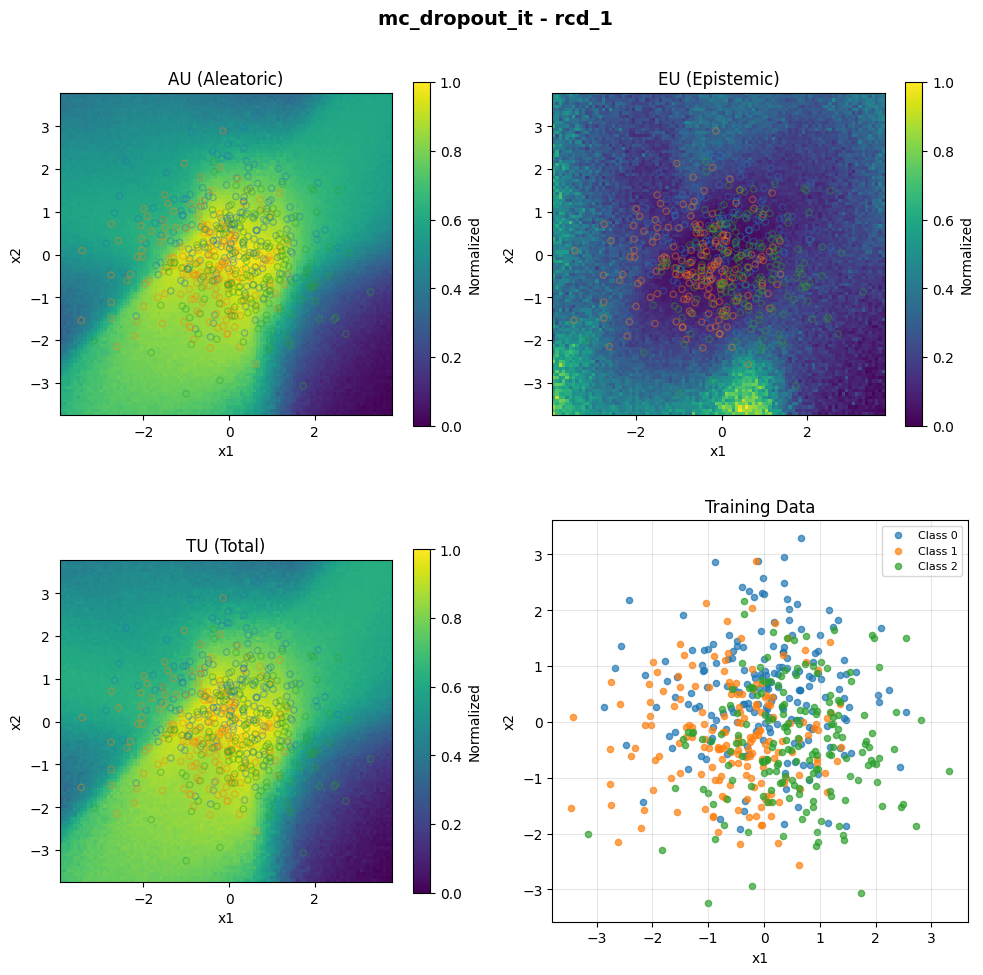


Training mc_dropout_it (IT) - rcd_7
CUDA not available. Using CPU.
[MC Dropout IT] Epoch 100/300 - avg loss 0.0435
[MC Dropout IT] Epoch 200/300 - avg loss 0.0208
[MC Dropout IT] Epoch 300/300 - avg loss 0.0175
CUDA not available. Using CPU.
CUDA not available. Using CPU.
[MC Dropout IT] Epoch 100/300 - avg loss 0.0185
[MC Dropout IT] Epoch 200/300 - avg loss 0.0228
[MC Dropout IT] Epoch 300/300 - avg loss 0.0143
CUDA not available. Using CPU.
  Train Accuracy: 0.9982, ECE: 0.0106
  Mean TU: 0.0693, AU: 0.0303, EU: 0.0390
Saved classification outputs: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\rcd\outputs\classification\rcd\mc_dropout_it\mc_dropout_it_rcd_7_outputs.npz
Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\rcd\plots\classification\rcd\mc_dropout_it\heatmaps\mc_dropout_it_panel_rc

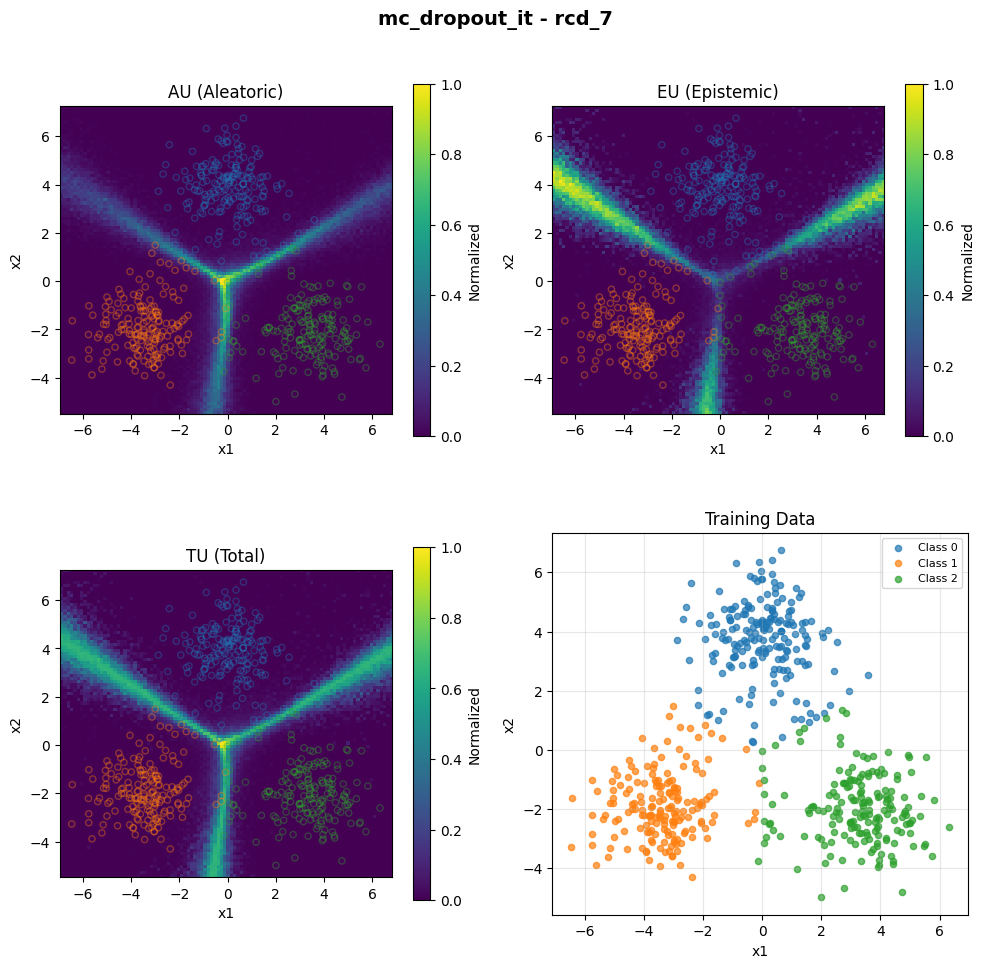

Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\rcd\plots\classification\rcd\mc_dropout_it\mc_dropout_it_IT_uncertainty_(normalized)_vs_rcd.png


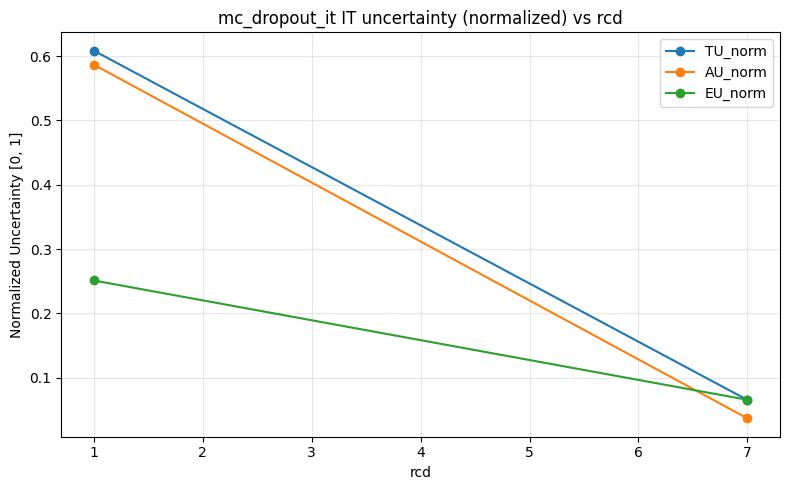

Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\rcd\plots\classification\rcd\mc_dropout_it\mc_dropout_it_metrics_vs_rcd.png


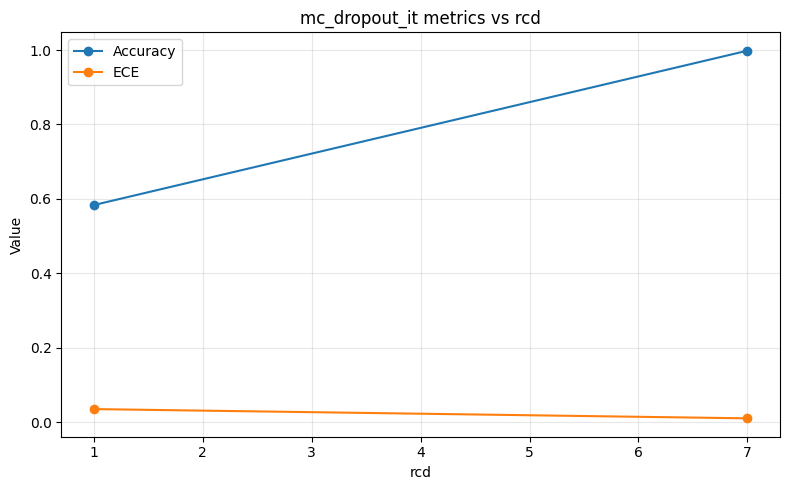

Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\rcd\plots\classification\rcd\mc_dropout_it\mc_dropout_it_AU-EU_correlation_vs_rcd.png


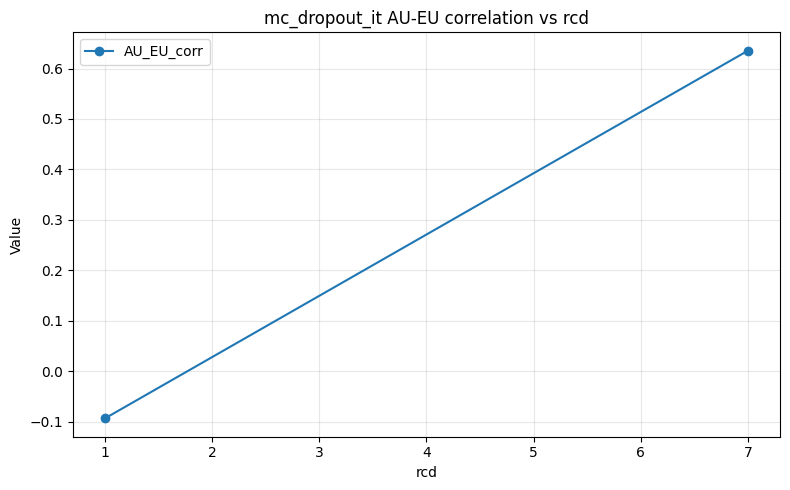

Saved statistics: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\rcd\statistics\classification\rcd\mc_dropout_it\mc_dropout_it_rcd_summary.xlsx


In [5]:
results_mc_dropout_it = run_mc_dropout_it_rcd_experiment(
    base_cfg=base_cfg,
    rcd_values=rcd_values,
    seed=seed,
)

## MC Dropout GL

In [ ]:
results_mc_dropout_gl = run_mc_dropout_gl_rcd_experiment(
    base_cfg=base_cfg,
    rcd_values=rcd_values,
    seed=seed,
)

## Deep Ensemble IT

In [ ]:
results_deep_ensemble_it = run_deep_ensemble_it_rcd_experiment(
    base_cfg=base_cfg,
    rcd_values=rcd_values,
    seed=seed,
)

## Deep Ensemble GL

In [ ]:
results_deep_ensemble_gl = run_deep_ensemble_gl_rcd_experiment(
    base_cfg=base_cfg,
    rcd_values=rcd_values,
    seed=seed,
)

## BNN IT

In [ ]:
# BNN is computationally expensive
# Uncomment to run:
# results_bnn_it = run_bnn_it_rcd_experiment(
#     base_cfg=base_cfg,
#     rcd_values=rcd_values_bnn,
#     seed=seed,
# )

## BNN GL

In [ ]:
# BNN is computationally expensive
# Uncomment to run:
# results_bnn_gl = run_bnn_gl_rcd_experiment(
#     base_cfg=base_cfg,
#     rcd_values=rcd_values_bnn,
#     seed=seed,
# )